In [1]:
# Categorical sampling

In [2]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import arviz as az

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0-dev20200309'

In [4]:
@pm.model
def model():
    var = yield pm.Categorical("var", probs=[0.1, 0.9])
    return var

In [5]:
trace = pm.sample(model(), sampler_type="compound", xla=True)

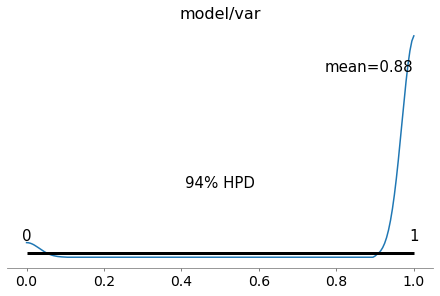

In [6]:
az.plot_posterior(trace, var_names="model/var");

## Manually set vars

In [7]:
from pymc4.mcmc.samplers import NUTS, RandomWalkM
trace = pm.sample(model(), 
                  sampler_type="compound", 
                  sampler_methods=[
                        ("var", RandomWalkM), 
                        ("mean", NUTS)
                  ], 
                  xla=True)

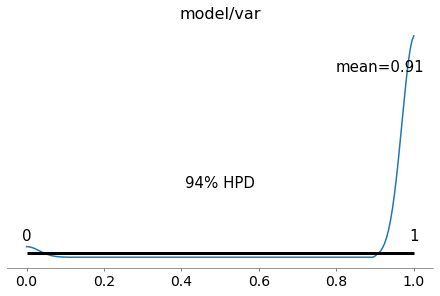

In [8]:
az.plot_posterior(trace, var_names="model/var");